In [4]:
import sqlite3
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

<h3>Historical Weather Data </h3>

In [5]:
# Database file name
database_name = "energy_data_NE.db"

# Table name to pull data from
table_name = "historical_weather_data"

# Connect to the SQLite database
conn = sqlite3.connect(database_name)

# Query to fetch data from the specified table
query = f"SELECT * FROM {table_name}"

columns_of_interest = ["temperature" ,'dwpt',"humidity", "precipitation",'wdir', "windspeed", 'pres',"cloudcover"]

# Execute the query and load the data into a pandas DataFrame
weather_data = pd.read_sql_query(query, conn)

x_historical=weather_data[columns_of_interest]
print(x_historical.head())


   temperature  dwpt  humidity  precipitation   wdir  windspeed    pres  \
0         15.0  15.0     100.0            0.0  150.0        7.6  1006.3   
1         15.6  15.6     100.0            0.0  200.0        5.4  1006.7   
2         15.6  15.6     100.0            0.0  200.0        5.4  1006.7   
3         17.2  17.2     100.0            0.0  200.0        7.6  1006.6   
4         16.1  16.1     100.0            0.0  170.0       13.0  1006.3   

   cloudcover  
0         5.0  
1         5.0  
2         5.0  
3         5.0  
4         4.0  


<h3>Solar Data</h3>

Far sighted model

In [6]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np
# import matplotlib.pyplot as plt
# # Taimport joblib
# #
# ble name to pull data from
# # table_name = "SUN_data_NE"

# # Connect to the SQLite database
# conn = sqlite3.connect("energy_data_NE.db")

# # Query to fetch data from the specified table
# query = f"SELECT * FROM {table_name}"

# # Execute the query and load the data into a pandas DataFrame
# sun_data = pd.read_sql_query(query, conn)
# y_sun=sun_data[['value']]

# print(y_sun.head())

# x_train, x_test, y_train, y_test = train_test_split(x_historical, y_sun,  test_size=0.3)
# # Define a range of hyperparameters for tuning
# param_grid = {
#     'n_estimators': [50, 100, 150],        # Number of boosting rounds
#     'max_depth': [3, 5, 7],                # Maximum tree depth
#     'learning_rate': [0.01, 0.1, 0.2],     # Learning rate (eta)
#     'subsample': [0.8, 1.0],               # Subsampling ratio of training samples
#     'colsample_bytree': [0.8, 1.0],        # Subsampling ratio of columns for each tree
# }

# x_test=x_test[:48]
# y_test=y_test[:48]

# xgboost_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# # Set up GridSearchCV with cross-validation
# grid_search_xgb = GridSearchCV(xgboost_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# # Fit the model
# grid_search_xgb.fit(x_train, y_train)

# # Retrieve best parameters and best score
# best_params_xgb = grid_search_xgb.best_params_
# best_score_xgb = grid_search_xgb.best_score_

# print(f"Best Parameters for XGBoost: {best_params_xgb}")
# print(f"Best Score (Negative MSE) for XGBoost: {best_score_xgb}")

# # Train the XGBoost Regressor with the best parameters
# best_xgb_model = grid_search_xgb.best_estimator_

# # Predict y values using the test set
# y_pred_xgb = best_xgb_model.predict(x_test)

# r2_xgb = r2_score(y_test, y_pred_xgb)

# linspace = np.linspace(0, len(y_test), len(y_test))

# plt.figure(figsize=(8, 6))

# plt.plot(linspace, y_pred_xgb, label="y_pred_xgb", color="green", linestyle = "--")

# plt.plot(linspace, y_test, label="y_test", color="red")

# plt.text(0.5, max(y_pred_xgb), f'R² = {r2_xgb:.2f}', fontsize=12, verticalalignment="bottom")

# plt.title("XGBoost Regression: Predicted vs Actual")
# plt.xlabel("Index")
# plt.ylabel("Generation MWh")
# plt.legend()

# plt.show()


# joblib.dump(best_xgb_model, 'solar_model.joblib')


Short sighted model

In [7]:
# x=x_historical[:336]
# y=y_sun[:336]
# x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.3)
# # Define a range of hyperparameters for tuning
# param_grid = {
#     'n_estimators': [50, 100, 150],        # Number of boosting rounds
#     'max_depth': [3, 5, 7],                # Maximum tree depth
#     'learning_rate': [0.01, 0.1, 0.2],     # Learning rate (eta)
#     'subsample': [0.8, 1.0],               # Subsampling ratio of training samples
#     'colsample_bytree': [0.8, 1.0],        # Subsampling ratio of columns for each tree
# }


# xgboost_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# # Set up GridSearchCV with cross-validation
# grid_search_xgb = GridSearchCV(xgboost_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# # Fit the model
# grid_search_xgb.fit(x_train, y_train)

# # Retrieve best parameters and best score
# best_params_xgb = grid_search_xgb.best_params_
# best_score_xgb = grid_search_xgb.best_score_

# print(f"Best Parameters for XGBoost: {best_params_xgb}")
# print(f"Best Score (Negative MSE) for XGBoost: {best_score_xgb}")

# # Train the XGBoost Regressor with the best parameters
# best_xgb_model = grid_search_xgb.best_estimator_

# # Predict y values using the test set
# y_pred_xgb = best_xgb_model.predict(x_test)

# r2_xgb = r2_score(y_test, y_pred_xgb)

# linspace = np.linspace(0, len(y_test), len(y_test))

# plt.figure(figsize=(8, 6))

# plt.plot(linspace, y_pred_xgb, label="y_pred_xgb", color="green", linestyle = "--")

# plt.plot(linspace, y_test, label="y_test", color="red")

# plt.text(0.5, max(y_pred_xgb), f'R² = {r2_xgb:.2f}', fontsize=12, verticalalignment="bottom")

# plt.title("XGBoost Regression: Predicted vs Actual")
# plt.xlabel("Index")
# plt.ylabel("Generation MWh")
# plt.legend()

# plt.show()

<h1>Improved Solar Far sighted model</h1>

Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 1.0}
Best Score (Negative MSE) for XGBoost: -2340.8782124233235


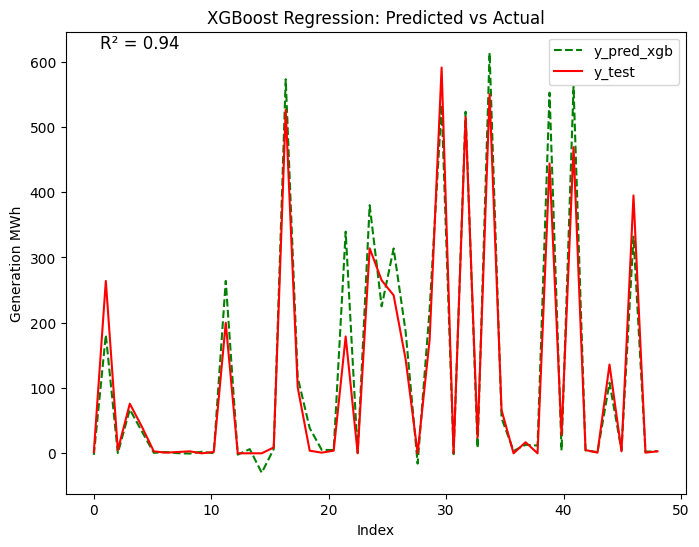


Feature Importance:
          feature  importance
8            hour    0.313269
10         season    0.260879
7      cloudcover    0.139972
11    time_of_day    0.084418
2        humidity    0.060877
9           month    0.046278
0     temperature    0.034635
4            wdir    0.025037
5       windspeed    0.012295
6            pres    0.010122
1            dwpt    0.006367
3   precipitation    0.005848


['solar_model.joblib']

In [8]:
import sqlite3
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Connect to the SQLite database
conn = sqlite3.connect("energy_data_NE.db")

# Query to fetch weather data
weather_query = """
SELECT time, temperature, dwpt, humidity, precipitation,
       wdir, windspeed, pres, cloudcover
FROM historical_weather_data
"""
weather_data = pd.read_sql_query(weather_query, conn)

# Load wind generation data
solar_query = "SELECT datetime, value FROM SUN_data_NE"
solar_data = pd.read_sql_query(solar_query, conn)

conn.close()

# Prepare the data
weather_data = weather_data.rename(columns={'time': 'datetime'})
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
solar_data['datetime'] = pd.to_datetime(solar_data['datetime'])

# Add temporal features
weather_data['hour'] = weather_data['datetime'].dt.hour
weather_data['month'] = weather_data['datetime'].dt.month

# Add season (1: Winter, 2: Spring, 3: Summer, 4: Fall)
weather_data['season'] = np.where(weather_data['datetime'].dt.month.isin([12, 1, 2]), 1,
                        np.where(weather_data['datetime'].dt.month.isin([3, 4, 5]), 2,
                        np.where(weather_data['datetime'].dt.month.isin([6, 7, 8]), 3, 4)))

# Add time of day (1: Night 0-6, 2: Morning 6-12, 3: Afternoon 12-18, 4: Evening 18-24)
weather_data['time_of_day'] = np.where(weather_data['datetime'].dt.hour < 6, 1,
                              np.where(weather_data['datetime'].dt.hour < 12, 2,
                              np.where(weather_data['datetime'].dt.hour < 18, 3, 4)))

# Merge weather and solar data
merged_data = pd.merge(weather_data, solar_data, on='datetime', how='inner')

# Prepare features and target
X = merged_data[['temperature', 'dwpt', 'humidity', 'precipitation',
                'wdir', 'windspeed', 'pres', 'cloudcover',
                'hour', 'month', 'season', 'time_of_day']]
y = merged_data[['value']]

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Limit test set to 48 samples for visualization
x_test = x_test[:48]
y_test = y_test[:48]

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],        # Number of boosting rounds
    'max_depth': [3, 5, 7],                # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],     # Learning rate (eta)
    'subsample': [0.8, 1.0],               # Subsampling ratio of training samples
    'colsample_bytree': [0.8, 1.0],        # Subsampling ratio of columns for each tree
}

xgboost_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV with cross-validation
grid_search_xgb = GridSearchCV(xgboost_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search_xgb.fit(x_train, y_train)

# Retrieve best parameters and best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best Score (Negative MSE) for XGBoost: {grid_search_xgb.best_score_}")

# Train the XGBoost Regressor with the best parameters
best_xgb_model = grid_search_xgb.best_estimator_

# Predict y values using the test set
y_pred_xgb = best_xgb_model.predict(x_test)

r2_xgb = r2_score(y_test, y_pred_xgb)

linspace = np.linspace(0, len(y_test), len(y_test))

plt.figure(figsize=(8, 6))

plt.plot(linspace, y_pred_xgb, label="y_pred_xgb", color="green", linestyle="--")
plt.plot(linspace, y_test, label="y_test", color="red")

plt.text(0.5, max(y_pred_xgb), f'R² = {r2_xgb:.2f}', fontsize=12, verticalalignment="bottom")

plt.title("XGBoost Regression: Predicted vs Actual")
plt.xlabel("Index")
plt.ylabel("Generation MWh")
plt.legend()

plt.show()

# Print feature importance
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(importance)

joblib.dump(best_xgb_model, 'solar_model.joblib')


<h3>WIND data</h3>

Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Best Score (Negative MSE) for XGBoost: -19286.371416229464


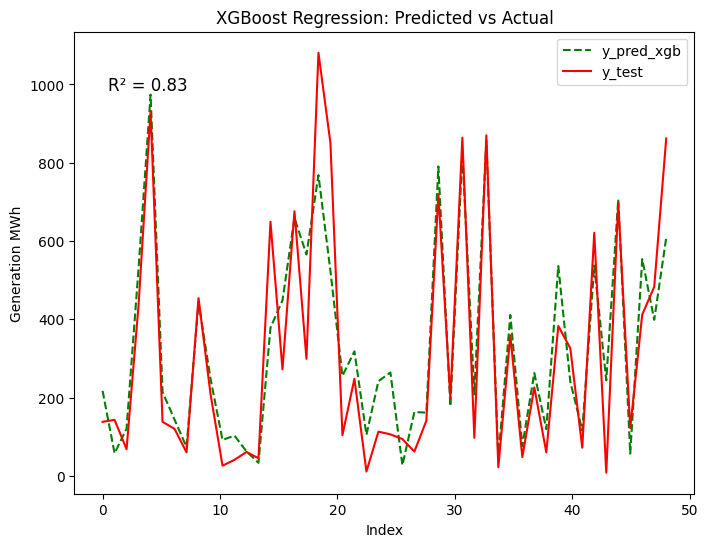


Feature Importance:
          feature  importance
5       windspeed    0.256161
4            wdir    0.156230
7      cloudcover    0.095374
9           month    0.083806
2        humidity    0.083448
10         season    0.081300
1            dwpt    0.073230
8            hour    0.053128
6            pres    0.046864
0     temperature    0.046197
3   precipitation    0.024262
11    time_of_day    0.000000


['wind_model.joblib']

In [9]:
import sqlite3
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Connect to the SQLite database
conn = sqlite3.connect("energy_data_NE.db")

# Query to fetch weather data
weather_query = """
SELECT time, temperature, dwpt, humidity, precipitation,
       wdir, windspeed, pres, cloudcover
FROM historical_weather_data
"""
weather_data = pd.read_sql_query(weather_query, conn)

# Load wind generation data
wind_query = "SELECT datetime, value FROM WND_data_NE"
wind_data = pd.read_sql_query(wind_query, conn)

conn.close()

# Prepare the data
weather_data = weather_data.rename(columns={'time': 'datetime'})
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
wind_data['datetime'] = pd.to_datetime(wind_data['datetime'])

# Add temporal features
weather_data['hour'] = weather_data['datetime'].dt.hour
weather_data['month'] = weather_data['datetime'].dt.month

# Add season (1: Winter, 2: Spring, 3: Summer, 4: Fall)
weather_data['season'] = np.where(weather_data['datetime'].dt.month.isin([12, 1, 2]), 1,
                        np.where(weather_data['datetime'].dt.month.isin([3, 4, 5]), 2,
                        np.where(weather_data['datetime'].dt.month.isin([6, 7, 8]), 3, 4)))

# Add time of day (1: Night 0-6, 2: Morning 6-12, 3: Afternoon 12-18, 4: Evening 18-24)
weather_data['time_of_day'] = np.where(weather_data['datetime'].dt.hour < 6, 1,
                              np.where(weather_data['datetime'].dt.hour < 12, 2,
                              np.where(weather_data['datetime'].dt.hour < 18, 3, 4)))

# Merge weather and wind data
merged_data = pd.merge(weather_data, wind_data, on='datetime', how='inner')

# Prepare features and target
X = merged_data[['temperature', 'dwpt', 'humidity', 'precipitation',
                'wdir', 'windspeed', 'pres', 'cloudcover',
                'hour', 'month', 'season', 'time_of_day']]
y = merged_data[['value']]

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Limit test set to 48 samples for visualization
x_test = x_test[:48]
y_test = y_test[:48]

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],        # Number of boosting rounds
    'max_depth': [3, 5, 7],                # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],     # Learning rate (eta)
    'subsample': [0.8, 1.0],               # Subsampling ratio of training samples
    'colsample_bytree': [0.8, 1.0],        # Subsampling ratio of columns for each tree
}

xgboost_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV with cross-validation
grid_search_xgb = GridSearchCV(xgboost_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search_xgb.fit(x_train, y_train)

# Retrieve best parameters and best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best Score (Negative MSE) for XGBoost: {grid_search_xgb.best_score_}")

# Train the XGBoost Regressor with the best parameters
best_xgb_model = grid_search_xgb.best_estimator_

# Predict y values using the test set
y_pred_xgb = best_xgb_model.predict(x_test)

r2_xgb = r2_score(y_test, y_pred_xgb)

linspace = np.linspace(0, len(y_test), len(y_test))

plt.figure(figsize=(8, 6))

plt.plot(linspace, y_pred_xgb, label="y_pred_xgb", color="green", linestyle="--")
plt.plot(linspace, y_test, label="y_test", color="red")

plt.text(0.5, max(y_pred_xgb), f'R² = {r2_xgb:.2f}', fontsize=12, verticalalignment="bottom")

plt.title("XGBoost Regression: Predicted vs Actual")
plt.xlabel("Index")
plt.ylabel("Generation MWh")
plt.legend()

plt.show()

# Print feature importance
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(importance)

joblib.dump(best_xgb_model, 'wind_model.joblib')

<h3>Natural Gas data</h3>

In [10]:

# Table name to pull data from
table_name = "NG_data_NE"

# Connect to the SQLite database
conn = sqlite3.connect(database_name)

# Query to fetch data from the specified table
query = f"SELECT * FROM {table_name}"

# Execute the query and load the data into a pandas DataFrame
NG_data = pd.read_sql_query(query, conn)


<h2>Demand</h2>

In [11]:
import joblib

# Table name to pull data from
table_name = "demand_data_NE"

# Connect to the SQLite database
conn = sqlite3.connect("energy_data_NE.db")

# Query to fetch data from the specified table
query = f"SELECT * FROM {table_name}"

# Execute the query and load the data into a pandas DataFrame
demand_data = pd.read_sql_query(query, conn)

y_demand=demand_data['Demand']

joblib.dump(best_xgb_model, 'demand_model.joblib')


['demand_model.joblib']

Far sighted model

Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Best Score (Negative MSE) for XGBoost: -460349.7545846313
<class 'numpy.ndarray'>


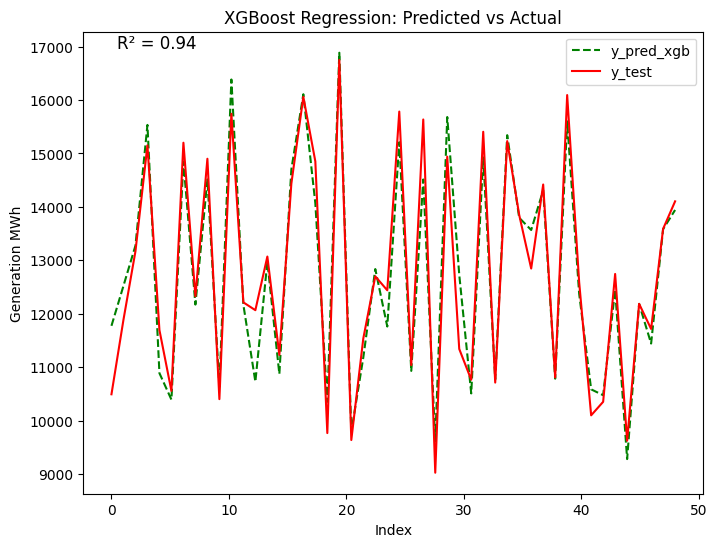


Feature Importance:
          feature  importance
10         season    0.540046
1            dwpt    0.147310
8            hour    0.143392
0     temperature    0.060930
9           month    0.040376
7      cloudcover    0.020321
2        humidity    0.012170
3   precipitation    0.009364
6            pres    0.009117
4            wdir    0.009097
5       windspeed    0.007878
11    time_of_day    0.000000


['demand_model.joblib']

In [12]:
import sqlite3
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Connect to the SQLite database
conn = sqlite3.connect("energy_data_NE.db")

# Query to fetch weather data
weather_query = """
SELECT time, temperature, dwpt, humidity, precipitation,
       wdir, windspeed, pres, cloudcover
FROM historical_weather_data
"""
weather_data = pd.read_sql_query(weather_query, conn)

# Load wind generation data
demand_query = "SELECT datetime, Demand FROM demand_data_NE"
demand_data = pd.read_sql_query(demand_query, conn)

conn.close()

# Prepare the data
weather_data = weather_data.rename(columns={'time': 'datetime'})
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
demand_data['datetime'] = pd.to_datetime(demand_data['datetime'])

# Add temporal features
weather_data['hour'] = weather_data['datetime'].dt.hour
weather_data['month'] = weather_data['datetime'].dt.month

# Add season (1: Winter, 2: Spring, 3: Summer, 4: Fall)
weather_data['season'] = np.where(weather_data['datetime'].dt.month.isin([12, 1, 2]), 1,
                        np.where(weather_data['datetime'].dt.month.isin([3, 4, 5]), 2,
                        np.where(weather_data['datetime'].dt.month.isin([6, 7, 8]), 3, 4)))

# Add time of day (1: Night 0-6, 2: Morning 6-12, 3: Afternoon 12-18, 4: Evening 18-24)
weather_data['time_of_day'] = np.where(weather_data['datetime'].dt.hour < 6, 1,
                              np.where(weather_data['datetime'].dt.hour < 12, 2,
                              np.where(weather_data['datetime'].dt.hour < 18, 3, 4)))

# Merge weather and demand data
merged_data = pd.merge(weather_data, demand_data, on='datetime', how='inner')

# Prepare features and target
X = merged_data[['temperature', 'dwpt', 'humidity', 'precipitation',
                'wdir', 'windspeed', 'pres', 'cloudcover',
                'hour', 'month', 'season', 'time_of_day']]
y = merged_data[['Demand']]

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Limit test set to 48 samples for visualization
x_test = x_test[:48]
y_test = y_test[:48]

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],        # Number of boosting rounds
    'max_depth': [3, 5, 7],                # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],     # Learning rate (eta)
    'subsample': [0.8, 1.0],               # Subsampling ratio of training samples
    'colsample_bytree': [0.8, 1.0],        # Subsampling ratio of columns for each tree
}

xgboost_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV with cross-validation
grid_search_xgb = GridSearchCV(xgboost_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search_xgb.fit(x_train, y_train)

# Retrieve best parameters and best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best Score (Negative MSE) for XGBoost: {grid_search_xgb.best_score_}")

# Train the XGBoost Regressor with the best parameters
best_xgb_model = grid_search_xgb.best_estimator_

# Predict y values using the test set
y_pred_xgb = best_xgb_model.predict(x_test)
print(type(y_pred_xgb))

r2_xgb = r2_score(y_test, y_pred_xgb)

linspace = np.linspace(0, len(y_test), len(y_test))

plt.figure(figsize=(8, 6))

plt.plot(linspace, y_pred_xgb, label="y_pred_xgb", color="green", linestyle="--")
plt.plot(linspace, y_test, label="y_test", color="red")

plt.text(0.5, max(y_pred_xgb), f'R² = {r2_xgb:.2f}', fontsize=12, verticalalignment="bottom")

plt.title("XGBoost Regression: Predicted vs Actual")
plt.xlabel("Index")
plt.ylabel("Generation MWh")
plt.legend()

plt.show()

# Print feature importance
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(importance)

joblib.dump(best_xgb_model, 'demand_model.joblib')


Short sighted model

In [13]:
# x=x_historical[:336]
# y=y_demand[:336]
# x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.3)
# # Define a range of hyperparameters for tuning
# param_grid = {
#     'n_estimators': [50, 100, 150],        # Number of boosting rounds
#     'max_depth': [3, 5, 7],                # Maximum tree depth
#     'learning_rate': [0.01, 0.1, 0.2],     # Learning rate (eta)
#     'subsample': [0.8, 1.0],               # Subsampling ratio of training samples
#     'colsample_bytree': [0.8, 1.0],        # Subsampling ratio of columns for each tree
# }

# x_test=x_test[:48]
# y_test=y_test[:48]

# xgboost_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# # Set up GridSearchCV with cross-validation
# grid_search_xgb = GridSearchCV(xgboost_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# # Fit the model
# grid_search_xgb.fit(x_train, y_train)

# # Retrieve best parameters and best score
# best_params_xgb = grid_search_xgb.best_params_
# best_score_xgb = grid_search_xgb.best_score_

# print(f"Best Parameters for XGBoost: {best_params_xgb}")
# print(f"Best Score (Negative MSE) for XGBoost: {best_score_xgb}")

# # Train the XGBoost Regressor with the best parameters
# best_xgb_model = grid_search_xgb.best_estimator_

# # Predict y values using the test set
# y_pred_xgb = best_xgb_model.predict(x_test)

# r2_xgb = r2_score(y_test, y_pred_xgb)

# linspace = np.linspace(0, len(y_test), len(y_test))

# plt.figure(figsize=(8, 6))

# plt.plot(linspace, y_pred_xgb, label="y_pred_xgb", color="green", linestyle = "--")

# plt.plot(linspace, y_test, label="y_test", color="red")

# plt.text(0.5, max(y_pred_xgb), f'R² = {r2_xgb:.2f}', fontsize=12, verticalalignment="bottom")

# plt.title("XGBoost Regression: Predicted vs Actual")
# plt.xlabel("Index")
# plt.ylabel("Generation MWh")
# plt.legend()

# plt.show()


In [14]:
# tableau_export.ipynb

# Import required libraries
# import pandas as pd
# import sqlite3

# # Import the export function
# from tableau_public_export import prepare_data_for_tableau_public

# # Run the export
# print("Starting data export for Tableau...")
# data_file = prepare_data_for_tableau_public()

# # Verify the exported data
# df = pd.read_csv(data_file)
# print("\nExported Data Preview:")
# print(df.head())

# print("\nData Shape:", df.shape)
# print("\nColumns:", df.columns.tolist())

# # Print next steps
# print("\nNext steps:")
# print("1. Go to https://public.tableau.com/")
# print("2. Sign up or log in")
# print("3. Create New Workbook")
# print("4. Connect to Text file (CSV)")
# print(f"5. Select the exported file: {data_file}")

In [15]:
# # Then import and create dashboard
# from dashboard import EnergyDashboard

# # Create and display dashboard
# dashboard = EnergyDashboard()